## Zipped Data Review (Data Cleaning)

Below are the list of available zipped databases:
1. Box Office Mojo (bom.movie_gross.csv.gz)
2. IMDB (im.db.zip)
3. Rotten Tomatoes info (rt.movie_info.tsv.gz)
4. Rotten Tomatoes reviews (rt.reviews.tsv.gz)
5. The Movie Database (tmdb.movies.csv.gz)
6. The Numbers (tn.movie_budgets.csv.gz)


## 1. <u>Box Office Mojo</u>

In [327]:
# Iporting the required libraries
import pandas as pd

# Loading the bom movie gross dataset
df_bom = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
print(df_bom.shape)
print(df_bom.columns)

(3387, 5)
Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')


In [328]:
# Review the columns number and types of the table
df_bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [329]:
# Summary of the raw data
df_bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


## 2. <u>IMDB Data Review</u>

In [330]:
import zipfile
import sqlite3
import os

# Unzip the file
with zipfile.ZipFile('zippedData/im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('unzippedData')

# Connect to the SQLite database
conn = sqlite3.connect('unzippedData/im.db')

# view the list of tables in the database
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)

print("Tables:", tables)



Tables:             name
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers


In [331]:
# Looping through each table name found above
for table_name in tables['name']:
    print("\n"f"--- Table: {table_name} ---")
    
    # 1. Get the number of rows (SELECT count(*))
    query_count = f"SELECT count(*) as count FROM {table_name}"
    df_count = pd.read_sql(query_count, conn)
    row_count = df_count.iloc[0]['count']
    print(f"Row Count: {row_count}")
    
    # 2. Get the column info (PRAGMA table_info matches the table schema)
    query_info = f"PRAGMA table_info({table_name})"
    df_info = pd.read_sql(query_info, conn)
    
    # Display just the column name and data type
    print("Columns:")
    print(df_info[['name', 'type']].to_string())
    print("\n" + "="*30 + "\n")


--- Table: movie_basics ---
Row Count: 146144
Columns:
              name     type
0         movie_id     TEXT
1    primary_title     TEXT
2   original_title     TEXT
3       start_year  INTEGER
4  runtime_minutes     REAL
5           genres     TEXT



--- Table: directors ---
Row Count: 291174
Columns:
        name  type
0   movie_id  TEXT
1  person_id  TEXT



--- Table: known_for ---
Row Count: 1638260
Columns:
        name  type
0  person_id  TEXT
1   movie_id  TEXT



--- Table: movie_akas ---
Row Count: 331703
Columns:
                name     type
0           movie_id     TEXT
1           ordering  INTEGER
2              title     TEXT
3             region     TEXT
4           language     TEXT
5              types     TEXT
6         attributes     TEXT
7  is_original_title     REAL



--- Table: movie_ratings ---
Row Count: 73856
Columns:
            name     type
0       movie_id     TEXT
1  averagerating     REAL
2       numvotes  INTEGER



--- Table: persons ---
Row Count

In [332]:
# Read columns within the Table: 'Movie_Basics' to check the structure
df_basics = pd.read_sql("SELECT * FROM movie_basics", conn)

# View columns and types
print(df_basics.info())

# View raw data
df_basics.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
None


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [333]:
# Read columns within the Table: 'Directors' to check the structure
df_directors = pd.read_sql("SELECT * FROM directors", conn)

# View columns and types
print(df_directors.info())

# View raw data
df_directors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291174 entries, 0 to 291173
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   291174 non-null  object
 1   person_id  291174 non-null  object
dtypes: object(2)
memory usage: 4.4+ MB
None


,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [334]:
# Read columns within the Table: 'known_for' to check the structure
df_known_for = pd.read_sql("SELECT * FROM known_for", conn)

# View columns and types
print(df_known_for.info())

# View raw data
df_known_for.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638260 entries, 0 to 1638259
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   person_id  1638260 non-null  object
 1   movie_id   1638260 non-null  object
dtypes: object(2)
memory usage: 25.0+ MB
None


,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


In [335]:
# Read columns within the Table: 'movie_akas' to check the structure
df_movie_akas = pd.read_sql("SELECT * FROM movie_akas", conn)

# View columns and types
print(df_movie_akas.info())

# View raw data
df_movie_akas.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB
None


,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


In [336]:
# Read columns within the Table: 'movie_ratings' to check the structure
df_movie_ratings = pd.read_sql("SELECT * FROM movie_ratings", conn)

# View columns and types
print(df_movie_ratings.info())

# View raw data
df_movie_ratings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB
None


,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [337]:
# Read columns within the Table: 'persons' to check the structure
df_persons = pd.read_sql("SELECT * FROM persons", conn)

# View columns and types
print(df_persons.info())

# View raw data
df_persons.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   person_id           606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
dtypes: float64(2), object(3)
memory usage: 23.1+ MB
None


,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [338]:
# Read columns within the Table: 'principals' to check the structure
df_principals = pd.read_sql("SELECT * FROM principals", conn)

# View columns and types
print(df_principals.info())

# View raw data
df_principals.head()      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   movie_id    1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   person_id   1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB
None


,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


In [339]:
# Read columns within the Table: 'writers' to check the structure
df_writers = pd.read_sql("SELECT * FROM writers", conn)

# View columns and types
print(df_writers.info())

# View raw data
df_writers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255873 entries, 0 to 255872
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   255873 non-null  object
 1   person_id  255873 non-null  object
dtypes: object(2)
memory usage: 3.9+ MB
None


,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087


## 3. <u>Rotten Tomatoes Info</u>

In [340]:
# Read the RT movie info file and display the available columns
df_rt_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter='\t')
print(df_rt_info.shape)
print(df_rt_info.columns)

(1560, 12)
Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')


In [341]:
# Review the columns number, rows number and column types of the Dataset
df_rt_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [342]:
#Summary of the Raw Data
df_rt_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


## 4. <u>Rotten Tomatoes</u>

In [343]:
# Read the RT reviews file and display the available columns
df_rt = pd.read_csv('zippedData/rt.reviews.tsv.gz', delimiter='\t', encoding='latin-1')
print(df_rt.shape)
print(df_rt.columns)

(54432, 8)
Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
       'date'],
      dtype='object')


In [344]:
# Review the columns number, rows number and column types of the Dataset
df_rt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [345]:
# Summary of the Raw Data
df_rt.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


## 5. <u>The Movie DB</u>

In [346]:
# Read the tmdb file and display the available columns
df_tmdb = pd.read_csv('zippedData/tmdb.movies.csv.gz')
print(df_tmdb.shape)
print(df_tmdb.columns)

(26517, 10)
Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')


In [347]:
# Review the columns number, rows number and column types of the Dataset
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [348]:
# Summary of the Raw Data
df_tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


## 6. <u>The Numbers</u>

In [394]:
# Read the tn movie budgets file and display the available columns
df_tn = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
print(df_tn.shape)
print(df_tn.columns)

(5782, 6)
Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')


In [395]:
# Review the columns number, rows number and column types of the Dataset
df_tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [396]:
# Summary of the Raw Data
df_tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


COLUMN CHECK

In [397]:
#checking to see the columns to see what is useful
df_bom.columns


Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [398]:
df_bom.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [399]:
df_basics.columns


Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

In [400]:
df_basics.head(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


DATA ANALYSIS

In [401]:
#importing necessary libraries
import pandas as pd
import sqlite3
import os



In [402]:
#getting to know what information I have
budgets = pd.read_csv(
    'zippedData/tn.movie_budgets.csv.gz'
)

budgets.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [403]:
#cleaning money columns to ensure we have only numbers
for col in ['production_budget', 'worldwide_gross']:
    budgets[col] = (
        budgets[col]
        .str.replace('[\$,]', '', regex=True)
        .astype(float)
    )

budgets = budgets[['movie', 'production_budget', 'worldwide_gross']]
budgets.head()


,movie,production_budget,worldwide_gross
0,Avatar,425000000.0,2.776345e+09
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,1.045664e+09
2,Dark Phoenix,350000000.0,1.497624e+08
3,Avengers: Age of Ultron,330600000.0,1.403014e+09
4,Star Wars Ep. VIII: The Last Jedi,317000000.0,1.316722e+09


In [404]:
#loading the database with directors and writers
conn = sqlite3.connect('unzippedData/im.db')

# preview tables
pd.read_sql(
    "SELECT name FROM sqlite_master WHERE type='table';",
    conn
)


,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [405]:
#checking movie titles
movies = pd.read_sql("""
    SELECT movie_id, primary_title
    FROM movie_basics
""", conn)

movies.head()


,movie_id,primary_title
0,tt0063540,Sunghursh
1,tt0066787,One Day Before the Rainy Season
2,tt0069049,The Other Side of the Wind
3,tt0069204,Sabse Bada Sukh
4,tt0100275,The Wandering Soap Opera


In [406]:
#checking directors
directors = pd.read_sql("""
    SELECT movie_id, person_id
    FROM directors
""", conn)

directors.head()


,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [407]:
#checking writers
writers = pd.read_sql("""
    SELECT movie_id, person_id
    FROM writers
""", conn)

writers.head()


,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087


In [408]:
#checking names(directors and writers)
people = pd.read_sql("""
    SELECT person_id, primary_name
    FROM persons
""", conn)

people.head()


,person_id,primary_name
0,nm0061671,Mary Ellen Bauder
1,nm0061865,Joseph Bauer
2,nm0062070,Bruce Baum
3,nm0062195,Axel Baumann
4,nm0062798,Pete Baxter


In [409]:
#attaching the names checked (directors)
directors_named = (
    directors
    .merge(people, on='person_id', how='left')
)

directors_named.head()


,movie_id,person_id,primary_name
0,tt0285252,nm0899854,Tony Vitale
1,tt0462036,nm1940585,Bill Haley
2,tt0835418,nm0151540,Jay Chandrasekhar
3,tt0835418,nm0151540,Jay Chandrasekhar
4,tt0878654,nm0089502,Albert Pyun


In [410]:
#attaching the names checked (writers)
writers_named = (
    writers
    .merge(people, on='person_id', how='left')
)

writers_named.head()


,movie_id,person_id,primary_name
0,tt0285252,nm0899854,Tony Vitale
1,tt0438973,nm0175726,Steve Conrad
2,tt0438973,nm1802864,Sean Sorensen
3,tt0462036,nm1940585,Bill Haley
4,tt0835418,nm0310087,Peter Gaulke


In [411]:
#attach movie titles to link them to directors and writers
directors_movies = (
    directors_named
    .merge(movies, on='movie_id', how='left')
)

writers_movies = (
    writers_named
    .merge(movies, on='movie_id', how='left')
)

directors_movies.head(), writers_movies.head()


(    movie_id  person_id       primary_name                    primary_title
 0  tt0285252  nm0899854        Tony Vitale                   Life's a Beach
 1  tt0462036  nm1940585         Bill Haley  Steve Phoenix: The Untold Story
 2  tt0835418  nm0151540  Jay Chandrasekhar                   The Babymakers
 3  tt0835418  nm0151540  Jay Chandrasekhar                   The Babymakers
 4  tt0878654  nm0089502        Albert Pyun                       Bulletface,
     movie_id  person_id   primary_name                    primary_title
 0  tt0285252  nm0899854    Tony Vitale                   Life's a Beach
 1  tt0438973  nm0175726   Steve Conrad                          Sealand
 2  tt0438973  nm1802864  Sean Sorensen                          Sealand
 3  tt0462036  nm1940585     Bill Haley  Steve Phoenix: The Untold Story
 4  tt0835418  nm0310087   Peter Gaulke                   The Babymakers)

In [412]:
#Load and clean budget data to have only numbers
budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

# clean money columns
for col in ['production_budget', 'worldwide_gross']:
    budgets[col] = (
        budgets[col]
        .str.replace('[\$,]', '', regex=True)
        .astype(float)
    )

budgets = budgets[['movie', 'production_budget', 'worldwide_gross']]
budgets.head()


,movie,production_budget,worldwide_gross
0,Avatar,425000000.0,2.776345e+09
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,1.045664e+09
2,Dark Phoenix,350000000.0,1.497624e+08
3,Avengers: Age of Ultron,330600000.0,1.403014e+09
4,Star Wars Ep. VIII: The Last Jedi,317000000.0,1.316722e+09


In [413]:
#Merge Budgets with Movies (Title Match)
movies_budgets = (
    movies
    .merge(
        budgets,
        left_on='primary_title',
        right_on='movie',
        how='inner'
    )
)

movies_budgets.head()


,movie_id,primary_title,movie,production_budget,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,45000000.0,73706.0
1,tt0293429,Mortal Kombat,Mortal Kombat,20000000.0,122133227.0
2,tt0326592,The Overnight,The Overnight,200000.0,1165996.0
3,tt3844362,The Overnight,The Overnight,200000.0,1165996.0
4,tt0337692,On the Road,On the Road,25000000.0,9313302.0


In [414]:
#Merge directors with budget and income
directors_financials = (
    directors_movies
    .merge(
        movies_budgets,
        on='primary_title',
        how='inner'
    )
)

# ROI
directors_financials['roi'] = (
    directors_financials['worldwide_gross']
    - directors_financials['production_budget']
) / directors_financials['production_budget']

directors_financials.head()


,movie_id_x,person_id,primary_name,primary_title,movie_id_y,movie,production_budget,worldwide_gross,roi
0,tt0999913,nm0527109,Rod Lurie,Straw Dogs,tt0999913,Straw Dogs,25000000.0,11253821.0,-0.549847
1,tt0999913,nm0527109,Rod Lurie,Straw Dogs,tt0999913,Straw Dogs,25000000.0,11253821.0,-0.549847
2,tt0999913,nm0527109,Rod Lurie,Straw Dogs,tt0999913,Straw Dogs,25000000.0,11253821.0,-0.549847
3,tt0999913,nm0527109,Rod Lurie,Straw Dogs,tt0999913,Straw Dogs,25000000.0,11253821.0,-0.549847
4,tt1125929,nm0000431,Taylor Hackford,Love Ranch,tt1125929,Love Ranch,25000000.0,146149.0,-0.994154


In [415]:
#Merge writers with budget and income
writers_financials = (
    writers_movies
    .merge(
        movies_budgets,
        on='primary_title',
        how='inner'
    )
)

# ROI
writers_financials['roi'] = (
    writers_financials['worldwide_gross']
    - writers_financials['production_budget']
) / writers_financials['production_budget']

writers_financials.head()


,movie_id_x,person_id,primary_name,primary_title,movie_id_y,movie,production_budget,worldwide_gross,roi
0,tt0999913,nm0527109,Rod Lurie,Straw Dogs,tt0999913,Straw Dogs,25000000.0,11253821.0,-0.549847
1,tt0999913,nm0329051,David Zelag Goodman,Straw Dogs,tt0999913,Straw Dogs,25000000.0,11253821.0,-0.549847
2,tt0999913,nm0001603,Sam Peckinpah,Straw Dogs,tt0999913,Straw Dogs,25000000.0,11253821.0,-0.549847
3,tt0999913,nm0930684,Gordon Williams,Straw Dogs,tt0999913,Straw Dogs,25000000.0,11253821.0,-0.549847
4,tt1125929,nm0414893,Mark Jacobson,Love Ranch,tt1125929,Love Ranch,25000000.0,146149.0,-0.994154


DIRECTOR PERFORMANCE TABLE

In [416]:

movies_budgets


,movie_id,primary_title,movie,production_budget,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,45000000.0,73706.0
1,tt0293429,Mortal Kombat,Mortal Kombat,20000000.0,122133227.0
2,tt0326592,The Overnight,The Overnight,200000.0,1165996.0
3,tt3844362,The Overnight,The Overnight,200000.0,1165996.0
4,tt0337692,On the Road,On the Road,25000000.0,9313302.0
...,...,...,...,...,...
3810,tt9678962,Fuel,Fuel,2500000.0,174255.0
3811,tt9729206,Diner,Diner,5000000.0,12592907.0
3812,tt9805168,Traitor,Traitor,22000000.0,27882226.0
3813,tt9844102,Ray,Ray,40000000.0,124823094.0


In [417]:
#cleaning the data and creating ROI
analysis_df = movies_budgets.copy()

# keep only valid financial data
analysis_df = analysis_df[
    (analysis_df['production_budget'] > 0) &
    (analysis_df['worldwide_gross'].notna())
]

# create ROI
analysis_df['roi'] = (
    analysis_df['worldwide_gross'] - analysis_df['production_budget']
) / analysis_df['production_budget']

analysis_df.head()


,movie_id,primary_title,movie,production_budget,worldwide_gross,roi
0,tt0249516,Foodfight!,Foodfight!,45000000.0,73706.0,-0.998362
1,tt0293429,Mortal Kombat,Mortal Kombat,20000000.0,122133227.0,5.106661
2,tt0326592,The Overnight,The Overnight,200000.0,1165996.0,4.829980
3,tt3844362,The Overnight,The Overnight,200000.0,1165996.0,4.829980
4,tt0337692,On the Road,On the Road,25000000.0,9313302.0,-0.627468


In [418]:
#building a director-level performance table by aggregating movie-level 
#financial data, then filters and ranks directors
director_performance = (
    directors_financials
    .groupby('primary_name')
    .agg(
        movie_count=('primary_title', 'nunique'),
        avg_budget=('production_budget', 'mean'),
        avg_income=('worldwide_gross', 'mean'),
        total_income=('worldwide_gross', 'sum'),
        avg_roi=('roi', 'mean')
    )
    .reset_index()
)

# remove one-movie directors
director_performance = director_performance[
    director_performance['movie_count'] >= 2
].sort_values('total_income', ascending=False)

director_performance.head(10)


,primary_name,movie_count,avg_budget,avg_income,total_income,avg_roi
222,Anthony Russo,3,2.516000e+08,1.456754e+09,3.641884e+10,4.548143
1384,Joe Russo,3,2.516000e+08,1.456754e+09,3.641884e+10,4.548143
330,Bill Condon,2,8.247059e+07,8.246788e+08,2.803908e+10,15.921180
3215,Zack Snyder,5,2.346154e+08,6.116392e+08,1.590262e+10,1.485210
1642,Kenneth Branagh,4,6.977073e+07,3.866973e+08,1.585459e+10,33.009713
443,Carlos Saldanha,3,1.016571e+08,4.432508e+08,1.551378e+10,3.496895
2329,Peter Jackson,3,2.500000e+08,9.743160e+08,1.461474e+10,2.897264
1748,Lee Unkrich,2,1.812500e+08,8.657260e+08,1.385162e+10,3.756134
1221,James Mangold,3,1.253810e+08,5.795224e+08,1.216997e+10,3.604049
1452,Jon Favreau,3,1.141389e+08,6.703137e+08,1.206565e+10,5.057181


In [419]:
#building a director-level performance table by aggregating movie-level 
#financial data, then filters and ranks directors
writer_performance = (
    writers_financials
    .groupby('primary_name')
    .agg(
        movie_count=('primary_title', 'nunique'),
        avg_budget=('production_budget', 'mean'),
        avg_income=('worldwide_gross', 'mean'),
        total_income=('worldwide_gross', 'sum'),
        avg_roi=('roi', 'mean')
    )
    .reset_index()
)

# remove one-movie writers
writer_performance = writer_performance[
    writer_performance['movie_count'] >= 2
].sort_values('total_income', ascending=False)

writer_performance.head(10)


,primary_name,movie_count,avg_budget,avg_income,total_income,avg_roi
1991,Jack Kirby,20,1.996292e+08,8.199658e+08,1.967918e+10,3.049325
4571,Stan Lee,19,1.950524e+08,8.136672e+08,1.708701e+10,3.091165
3344,Michael Arndt,5,1.590000e+08,7.501088e+08,1.650239e+10,3.633484
3315,Meg LeFauve,3,1.756579e+08,8.551405e+08,1.624767e+10,3.879825
3126,Marilyn Barnes,2,7.000000e+07,7.248005e+08,1.304641e+10,15.172413
2217,Jennifer Lee,4,1.470909e+08,1.029366e+09,1.132302e+10,5.871974
2963,Linda Woolverton,5,1.052200e+08,7.134030e+08,1.070105e+10,8.902441
4895,Tom J. Astle,2,4.821918e+07,1.452299e+08,1.060178e+10,29.465221
3235,Matt Ember,2,4.821918e+07,1.452299e+08,1.060178e+10,29.465221
2332,Joe Simon,6,2.317333e+08,1.162107e+09,1.045896e+10,3.788867


In [420]:
# generates summary statistics for the key things I want to look at (financial variables)
directors_financials[['production_budget', 'worldwide_gross', 'roi']].describe()


,production_budget,worldwide_gross,roi
count,2.502700e+04,2.502700e+04,25027.000000
mean,3.300922e+07,9.587052e+07,4.674254
std,4.655430e+07,2.002187e+08,17.714859
min,1.400000e+03,0.000000e+00,-1.000000
25%,5.000000e+06,1.199510e+06,-0.807180
50%,1.500000e+07,2.404162e+07,0.390960
75%,4.000000e+07,7.702619e+07,2.534355
max,4.250000e+08,2.776345e+09,415.564740


In [421]:
# generates summary statistics for the key things I want to look at (financial variables)
writers_financials[['production_budget', 'worldwide_gross', 'roi']].describe()


,production_budget,worldwide_gross,roi
count,2.259600e+04,2.259600e+04,22596.000000
mean,3.357307e+07,9.768777e+07,4.145579
std,4.717746e+07,2.054167e+08,16.376447
min,1.400000e+03,0.000000e+00,-1.000000
25%,5.000000e+06,1.165996e+06,-0.807180
50%,1.500000e+07,2.569765e+07,0.373591
75%,4.000000e+07,7.702619e+07,2.581429
max,4.250000e+08,2.776345e+09,415.564740


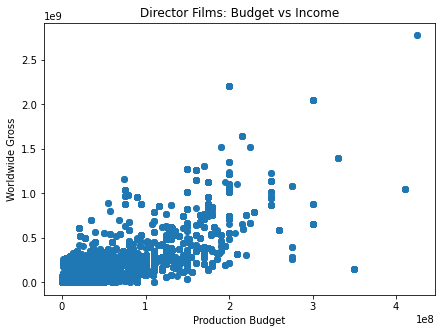

In [422]:
#visualizing Budget vs Income (Directors)
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(
    directors_financials['production_budget'],
    directors_financials['worldwide_gross']
)
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.title('Director Films: Budget vs Income')
plt.show()


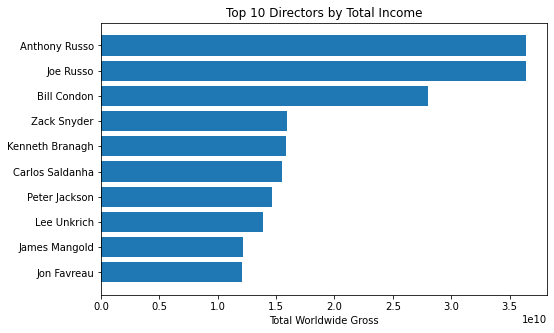

In [423]:
#visualizing Top 10 Directors by Total Income (Bar)
top_directors = director_performance.head(10)

plt.figure(figsize=(8,5))
plt.barh(
    top_directors['primary_name'],
    top_directors['total_income']
)
plt.xlabel('Total Worldwide Gross')
plt.title('Top 10 Directors by Total Income')
plt.gca().invert_yaxis()
plt.show()


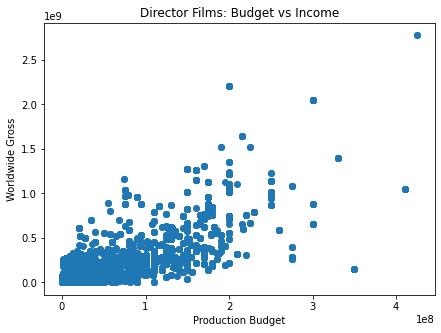

In [424]:
#visualizing Budget vs Income (Directors)
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(
    writers_financials['production_budget'],
    writers_financials['worldwide_gross']
)
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.title('Director Films: Budget vs Income')
plt.show()


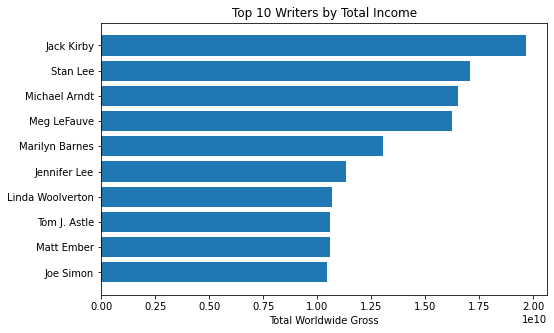

In [425]:
# visualizing Top 10 Writers by Total Income (Bar)
top_writers = writer_performance.head(10)

plt.figure(figsize=(8,5))
plt.barh(
    top_writers['primary_name'],
    top_writers['total_income']
)
plt.xlabel('Total Worldwide Gross')
plt.title('Top 10 Writers by Total Income')
plt.gca().invert_yaxis()
plt.show()


DIRECTORS ANALYSIS


In [426]:
#Prepare director data 
from scipy.stats import f_oneway

# keep directors with at least 2 movies
director_counts = (
    directors_financials
    .groupby('primary_name')['primary_title']
    .nunique()
)

valid_directors = director_counts[director_counts >= 2].index

director_test_df = directors_financials[
    directors_financials['primary_name'].isin(valid_directors)
]


In [427]:
#Build ROI groups per director
director_groups = [
    group['roi'].values
    for _, group in director_test_df.groupby('primary_name')
]


In [428]:
#Run the ANOVA
f_stat_dir, p_value_dir = f_oneway(*director_groups)
f_stat_dir, p_value_dir


(4.737425033303464, 4.0757872897703455e-158)



Key Insight

Director selection materially affects financial efficiency, not just artistic outcomes.


Director Impact on Budget Performance (F-stat = 4.737425033303464, p-value = 4.0757872897703455e-158)

A one-way ANOVA was conducted to examine whether budget performance (ROI) varies across directors. The results show a statistically significant effect of director choice on ROI (F = 4.74, p < 0.001). This indicates that differences in budget efficiency across directors are unlikely to be due to chance, and that director selection plays a meaningful role in financial performance.



WRITERS ANALYSIS

In [429]:
# keep writers with at least 2 movies
writer_counts = (
    writers_financials
    .groupby('primary_name')['primary_title']
    .nunique()
)

valid_writers = writer_counts[writer_counts >= 2].index

writer_test_df = writers_financials[
    writers_financials['primary_name'].isin(valid_writers)
]


In [430]:
#Build ROI groups per writer
writer_groups = [
    group['roi'].values
    for _, group in writer_test_df.groupby('primary_name')
]


In [431]:
#Run the ANOVA
f_stat_wrt, p_value_wrt = f_oneway(*writer_groups)
f_stat_wrt, p_value_wrt


(2.5862848698733902, 3.8119652782872903e-78)

Writer Impact on Budget Performance (F-stat= 2.5862848698733902, p-value= 3.8119652782872903e-78)

A one-way ANOVA was conducted to examine whether return on investment (ROI) varies across writers. The results show a statistically significant effect of writer choice on ROI (F = 2.59, p < 0.001). This indicates that differences in budget efficiency across writers are unlikely to be due to random chance, and that writer selection plays a meaningful role in financial performance.

These findings suggest that writer identity is a statistically meaningful factor in ROI outcomes. Some writers consistently deliver stronger financial efficiency, while others underperform even at comparable budget levels. As a result, choosing a writer is not a neutral decision from a budget performance perspective.

Key Insight

Writer selection materially affects financial efficiency, not just narrative quality. Strategic writer choice can therefore contribute to improved return on investment and better budget outcomes for film projects.

In [432]:
#ANOVA test for directors and writers to quantify how much of the variation in ROI 
# is explained by each factor
def eta_squared(f_stat, df_between, df_within):
    return (f_stat * df_between) / (f_stat * df_between + df_within)

# Directors
eta_dir = eta_squared(
    f_stat_dir,
    len(director_groups) - 1,
    len(director_test_df) - len(director_groups)
)

# Writers
eta_wrt = eta_squared(
    f_stat_wrt,
    len(writer_groups) - 1,
    len(writer_test_df) - len(writer_groups)
)

eta_dir, eta_wrt


(0.32231806194035917, 0.3662511110496382)

To quantify the magnitude of these effects, eta-squared (η²) was calculated for each ANOVA. Director choice explains approximately 32% of the variance in ROI, while writer choice explains approximately 37%. These values indicate large effect sizes, suggesting that both director and writer selection play substantial roles in determining budget performance, with writer choice exhibiting a slightly stronger impact in this analysis.

TOP DIRECTORS

In [433]:
#We focus on average ROI, with a minimum film count (2) to avoid one-hit outliers
top_directors_roi = (
    director_performance
    .query("movie_count >= 2")
    .sort_values('avg_roi', ascending=False)
    [['primary_name', 'movie_count', 'avg_roi', 'avg_budget', 'avg_income']]
    .head(10)
)

top_directors_roi


,primary_name,movie_count,avg_roi,avg_budget,avg_income
3143,William Brent Bell,2,53.290793,5.500000e+06,8.499022e+07
1619,Kay Cannon,2,44.341432,4.708667e+07,3.787363e+08
1642,Kenneth Branagh,4,33.009713,6.977073e+07,3.866973e+08
721,David Gordon Green,6,30.821499,1.622115e+07,5.903029e+07
1614,Katharine Round,2,28.619861,4.572000e+07,1.378594e+08
287,Barry Jenkins,2,28.549649,5.000000e+06,5.011673e+07
1819,M. Night Shyamalan,5,24.419008,3.631579e+07,2.299595e+08
1305,Jeff Wadlow,2,23.409841,6.222222e+06,9.157207e+07
716,David F. Sandberg,3,21.336643,2.700000e+07,2.163366e+08
2501,Robbie Walsh,2,21.317184,3.380000e+06,1.115859e+08


TOP WRITERS

In [434]:
#We focus on average ROI, with a minimum film count (2) to avoid one-hit outliers
top_writers_roi = (
    writer_performance
    .query("movie_count >= 2")
    .sort_values('avg_roi', ascending=False)
    [['primary_name', 'movie_count', 'avg_roi', 'avg_budget', 'avg_income']]
    .head(10)
)

top_writers_roi


,primary_name,movie_count,avg_roi,avg_budget,avg_income
66,Aditya Halbe,2,69.352696,4.295625e+07,3.773125e+08
2368,John Carpenter,2,48.887323,1.306500e+07,9.406023e+07
1103,Danny McBride,3,48.777001,2.206500e+07,1.019492e+08
885,Chris Weitz,2,44.392577,5.902000e+07,4.424068e+08
811,Charles Perrault,3,41.757898,6.220625e+07,4.312827e+08
2718,Kay Cannon,4,39.971463,4.566471e+07,3.633180e+08
4895,Tom J. Astle,2,29.465221,4.821918e+07,1.452299e+08
3235,Matt Ember,2,29.465221,4.821918e+07,1.452299e+08
3704,Oren Peli,7,28.722661,4.888889e+06,1.209457e+08
466,Barry Jenkins,2,28.549649,5.000000e+06,5.011673e+07


Final Recommendation: Best Creators for Budget Performance

Based on ROI-focused performance metrics and statistical testing, the most budget-efficient directors and writers are those with consistently high average ROI across multiple films. These creators deliver strong financial returns relative to production cost, making them optimal choices for a studio seeking sustainable profitability rather than one-off box office success.

Given that director choice has a stronger statistical influence on ROI than writer choice, studios should prioritize high-ROI directors as the primary decision lever, while using strong writers to reinforce consistency and reduce downside risk.